**在图像中绘制WCS坐标**  
@Time: 2022.09.15  
@Author: Ray  
@cite: https://docs.astropy.org/en/stable/visualization/wcsaxes/index.html

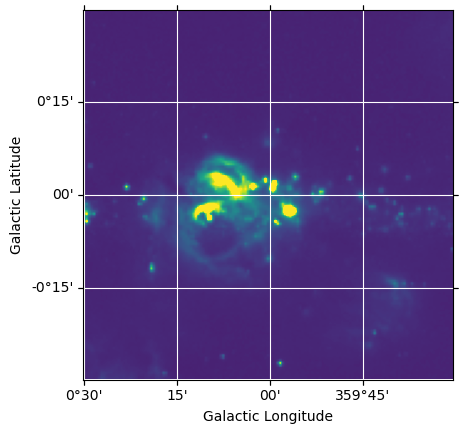

In [9]:
import matplotlib.pyplot as plt

from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

filename = get_pkg_data_filename('galactic_center/gc_msx_e.fits')

hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)

plt.subplot(projection=wcs)
plt.imshow(hdu.data, vmin=-2.e-5, vmax=2.e-4, origin='lower')
plt.grid(color='white', ls='solid')
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')

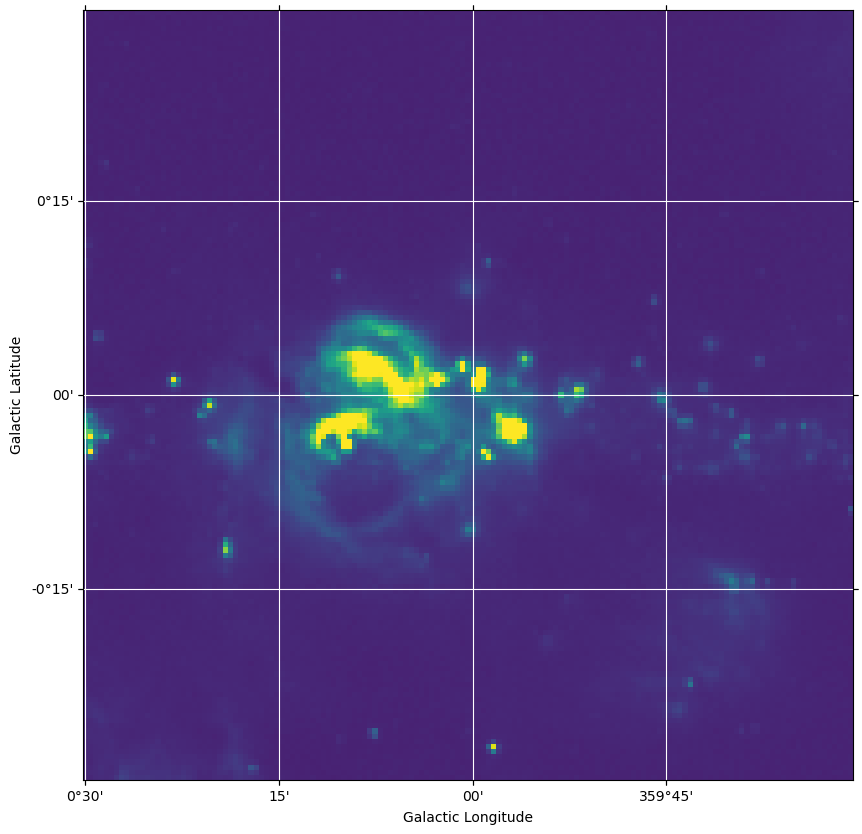

In [10]:
# 更常用的写法
fig, ax = plt.subplots(figsize=(10, 10))
ax = plt.subplot(projection=wcs)
ax.imshow(hdu.data, vmin=-2.e-5, vmax=2.e-4, origin='lower')
ax.grid(color='white', ls='solid')
ax.set_xlabel('Galactic Longitude')
ax.set_ylabel('Galactic Latitude')

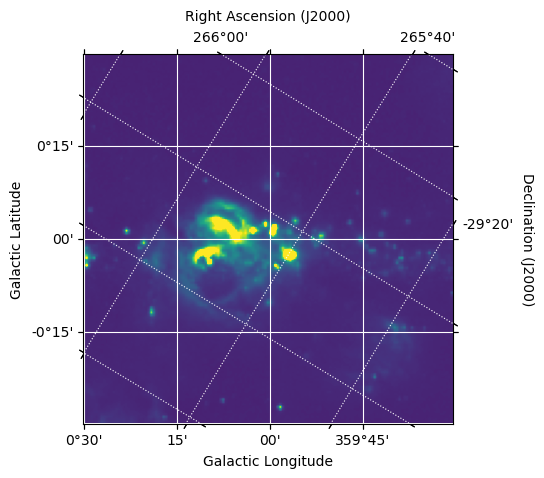

In [11]:
ax = plt.subplot(projection=wcs, label='overlays')

ax.imshow(hdu.data, vmin=-2.e-5, vmax=2.e-4, origin='lower')

ax.coords.grid(True, color='white', ls='solid')
ax.coords[0].set_axislabel('Galactic Longitude')
ax.coords[1].set_axislabel('Galactic Latitude')

overlay = ax.get_coords_overlay('fk5')
overlay.grid(color='white', ls='dotted')
overlay[0].set_axislabel('Right Ascension (J2000)')
overlay[1].set_axislabel('Declination (J2000)')